<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-with-Python/blob/master/Lab_04_1_Regresi%C3%B3n_Robusta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESIÓN ROBUSTA PARA MACHINE LEARNING EN PYTHON
## Creado por [MSc. Rubén Quispe](https://www.linkedin.com/in/msc-rub%C3%A9n-quispe-l/)
## [Curso de Machine Learning]()


La regresión es una tarea de modelado que implica predecir un valor numérico dado una entrada.

Los algoritmos utilizados para las tareas de regresión también se conocen como algoritmos de " regresión ", siendo el más conocido y quizás el más exitoso la regresión lineal.

La regresión lineal se ajusta a una línea o hiperplano que describe mejor la relación lineal entre las entradas y el valor numérico de objetivo o traget. Si los datos contienen valores atípicos, la línea puede sesgarse, lo que da como resultado un peor rendimiento predictivo. La regresión robusta se refiere a un conjunto de algoritmos que son robustos en presencia de valores atípicos en los datos de entrenamiento.

En este laboratorio, descubrirá algoritmos de regresión sólidos para el Machine Learning.

Después de completar este laboratrio, sabrá:

* Se pueden usar algoritmos de regresión robustos para datos con valores atípicos en los valores de entrada o de destino.
* Cómo evaluar algoritmos de regresión robustos para una tarea de modelado predictivo de regresión.
* Cómo comparar algoritmos de regresión robustos usando su línea de mejor ajuste en el conjunto de datos.

# DESCRIPCIÓN 
1. Regresión con valores atípicos
2. Conjunto de datos de regresión con valores atípicos
3. Algoritmos de regresión robustos
4. Comparar algoritmos de regresión robustos

# Regresión con valores atípicos
El modelado predictivo de regresión implica predecir una variable numérica dada alguna entrada, a menudo una entrada numérica.

Los algoritmos de ML que se utilizan para las tareas de modelado predictivo de regresión también se conocen como " regresión " o " algoritmos de regresión ". El método más común es la regresión lineal .

Muchos algoritmos de regresión son lineales porque asumen que la relación entre la variable o variables de entrada y la variable objetivo es lineal, como una línea en dos dimensiones, un plano en tres dimensiones y un hiperplano en dimensiones superiores. Esta es una suposición razonable para muchas tareas de predicción.

La regresión lineal supone que la distribución de probabilidad de cada variable se comporta bien, como tiene una distribución gaussiana. Cuanto menos se comporte la distribución de probabilidad de una característica en un conjunto de datos, menos probable es que la regresión lineal encuentre un buen ajuste.

Un problema específico con la distribución de probabilidad de las variables cuando se usa la regresión lineal son los valores atípicos. Estas son observaciones que están muy por fuera de la distribución esperada. Por ejemplo, si una variable tiene una distribución gaussiana, una observación que tenga 3 o 4 (o más) desviaciones estándar de la media se considera un valor atípico.

Un conjunto de datos puede tener valores atípicos en las variables de entrada o en la variable de objetivo, y ambos pueden causar problemas para un algoritmo de regresión lineal.

Los valores atípicos en un conjunto de datos pueden sesgar los estadísticos de resumen calculados para la variable, como la media y la desviación estándar, lo que a su vez puede sesgar el modelo hacia los valores atípicos, lejos de la masa central de observaciones. Esto da como resultado modelos que intentan equilibrar un buen rendimiento en valores atípicos y datos normales, y un peor rendimiento en ambos en general.

En cambio, la solución es utilizar versiones modificadas de regresión lineal que aborden específicamente la expectativa de valores atípicos en el conjunto de datos. Estos métodos se conocen como algoritmos de [regresión robustos](https://en.wikipedia.org/wiki/Robust_regression) .

# Conjunto de datos de regresión con valores atípicos
Podemos definir un conjunto de datos de regresión sintético usando la función [make_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html).

En este caso, queremos un conjunto de datos que podamos trazar y comprender fácilmente. Esto se puede lograr utilizando una única variable de entrada y una única variable de salida. No queremos que la tarea sea demasiado fácil, por lo que agregaremos una gran cantidad de ruido estadístico.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

%matplotlib inline

In [2]:
X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)

Una vez que tenemos el conjunto de datos, podemos aumentarlo agregando valores atípicos. Específicamente, agregaremos valores atípicos a las variables de entrada.

Esto se puede hacer cambiando algunas de las variables de entrada para que tengan un valor que sea un factor del número de desviaciones estándar de la media, como 2 a 4. Agregaremos 10 valores atípicos al conjunto de datos.

In [3]:
from random import random
from random import randint
from random import seed
from sklearn.datasets import make_regression
from matplotlib import pyplot
np.random.seed(1)

In [4]:
# agregando valores atipicos o outliers

seed(1)
for i in range(10):
	factor = randint(2, 4)
	if random() > 0.5:
		X[i] += factor * X.std()
	else:
		X[i] -= factor * X.std()


Podemos unir esto en una función que preparará el conjunto de datos. Luego se puede llamar a esta función y podemos trazar el conjunto de datos con los valores de entrada en el eje x y el objetivo o resultado en el eje y.

El ejemplo completo de preparación y trazado del conjunto de datos se enumera a continuación.

(100, 1) (100,)


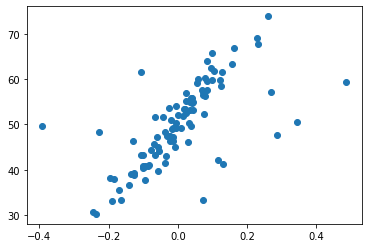

In [5]:
# prepare the dataset
def get_dataset():
	X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
	# add some artificial outliers
	seed(1)
	for i in range(10):
		factor = randint(2, 4)
		if random() > 0.5:
			X[i] += factor * X.std()
		else:
			X[i] -= factor * X.std()
	return X, y
 
# load dataset
X, y = get_dataset()
# summarize shape
print(X.shape, y.shape)
# scatter plot of input vs output
pyplot.scatter(X, y)
pyplot.show()

La ejecución del ejemplo crea el conjunto de datos de regresión sintético y agrega valores atípicos.

Luego, se traza el conjunto de datos y podemos ver claramente la relación lineal en los datos, con ruido estadístico y un número modesto de valores atípicos como puntos alejados de la masa principal de datos.

Ahora que tenemos un conjunto de datos, ajustemos diferentes modelos de regresión en él.

# Algoritmos de regresión robustos
En esta sección, consideraremos diferentes algoritmos de regresión robustos para el conjunto de datos.

# Regresión lineal (no robusta)
Antes de sumergirnos en algoritmos de regresión robustos, comencemos con la regresión lineal.

Podemos evaluar la regresión lineal mediante la validación cruzada repetida de k-fold en el conjunto de datos de regresión con valores atípicos (**Repeated k-fold cross validation**). Mediremos el error absoluto medio y esto proporcionará un límite inferior en el rendimiento del modelo en esta tarea que podríamos esperar que superen algunos algoritmos de regresión robustos.

In [6]:
# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)

También podemos trazar la línea de mejor ajuste del modelo en el conjunto de datos. Para hacer esto, primero ajustamos el modelo en todo el conjunto de datos de entrenamiento, luego creamos un conjunto de datos de entrada que es una cuadrícula en todo el dominio de entrada, hacemos una predicción para cada uno y luego dibujamos una línea para las entradas y salidas predichas.

Esta gráfica muestra cómo el modelo " ve " el problema, específicamente la relación entre las variables de entrada y salida. La idea es que la línea esté sesgada por los valores atípicos cuando se usa la regresión lineal.

In [7]:

# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fut the model on all data
	model.fit(X, y)
	# plot the dataset
	pyplot.scatter(X, y)
	# plot the line of best fit
	xaxis = arange(X.min(), X.max(), 0.01)
	yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	pyplot.plot(xaxis, yaxis, color='r')
	# show the plot
	pyplot.title(type(model).__name__)
	pyplot.show()

Al unir esto, el ejemplo completo de regresión lineal se enumera a continuación.

Mean MAE: 5.260 (1.149)


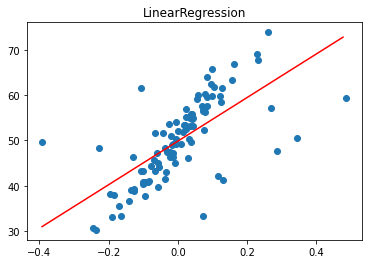

In [8]:
# linear regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
def get_dataset():
	X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
	# add some artificial outliers
	seed(1)
	for i in range(10):
		factor = randint(2, 4)
		if random() > 0.5:
			X[i] += factor * X.std()
		else:
			X[i] -= factor * X.std()
	return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fut the model on all data
	model.fit(X, y)
	# plot the dataset
	pyplot.scatter(X, y)
	# plot the line of best fit
	xaxis = arange(X.min(), X.max(), 0.01)
	yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	pyplot.plot(xaxis, yaxis, color='r')
	# show the plot
	pyplot.title(type(model).__name__)
	pyplot.show()
 
# load dataset
X, y = get_dataset()
# define the model
model = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)

Al ejecutar el ejemplo, primero se informa el MAE medio del modelo en el conjunto de datos.

Podemos ver que la regresión lineal logra un MAE de aproximadamente 5.2 en este conjunto de datos, proporcionando un límite superior de error.
Mean MAE: 5.260 (1.149)
A continuación, el conjunto de datos se traza como un diagrama de dispersión que muestra los valores atípicos y esto se superpone con la línea de mejor ajuste del algoritmo de regresión lineal.

En este caso, podemos ver que la línea de mejor ajuste no se alinea con los datos y ha sido sesgada por los valores atípicos. A su vez, esperamos que esto haya provocado que el modelo tenga un rendimiento peor de lo esperado en el conjunto de datos.

# Regresión de Huber
La [regresión de Huber](https://en.wikipedia.org/wiki/M-estimator) es un tipo de regresión robusta que es consciente de la posibilidad de valores atípicos en un conjunto de datos y les asigna menos peso que otros ejemplos en el conjunto de datos.

Podemos utilizar la regresión Huber a través de la [HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html) clase en scikit-learn. El argumento "épsilon" controla lo que se considera un valor atípico, donde los valores más pequeños consideran más datos atípicos y, a su vez, hacen que el modelo sea más robusto a los valores atípicos. El valor predeterminado es 1,35.

El siguiente ejemplo evalúa la regresión de Huber en el conjunto de datos de regresión con valores atípicos, primero evaluando el modelo con validación cruzada repetida y luego trazando la línea de mejor ajuste.

Mean MAE: 4.435 (1.868)


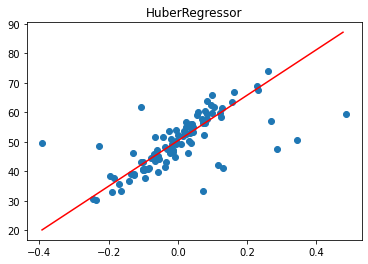

In [9]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
def get_dataset():
	X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
	# add some artificial outliers
	seed(1)
	for i in range(10):
		factor = randint(2, 4)
		if random() > 0.5:
			X[i] += factor * X.std()
		else:
			X[i] -= factor * X.std()
	return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fut the model on all data
	model.fit(X, y)
	# plot the dataset
	pyplot.scatter(X, y)
	# plot the line of best fit
	xaxis = arange(X.min(), X.max(), 0.01)
	yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	pyplot.plot(xaxis, yaxis, color='r')
	# show the plot
	pyplot.title(type(model).__name__)
	pyplot.show()
 
# load dataset
X, y = get_dataset()
# define the model
model = HuberRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)

Al ejecutar el ejemplo, primero se informa el MAE medio del modelo en el conjunto de datos.

Podemos ver que la regresión de Huber logra un MAE de aproximadamente 4.435 en este conjunto de datos, superando al modelo de regresión lineal en la sección anterior.

Mean MAE: 4.435 (1.868)

A continuación, el conjunto de datos se traza como un diagrama de dispersión que muestra los valores atípicos y esto se superpone con la línea de mejor ajuste del algoritmo.

En este caso, podemos ver que la línea de mejor ajuste está mejor alineada con el cuerpo principal de los datos y no parece estar obviamente influenciada por los valores atípicos que están presentes.

# RANSAC Regression
[Random Sample Consensus](https://en.wikipedia.org/wiki/Random_sample_consensus), o RANSAC para abreviar, es otro algoritmo de regresión robusto.

RANSAC intenta separar los datos en valores atípicos e inliers y ajusta el modelo a los inliers.

La libreía de scikit-learn proporciona una implementación a través de la clase [RANSACRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html).

El siguiente ejemplo evalúa la regresión RANSAC en el conjunto de datos de regresión con valores atípicos, primero evaluando el modelo con validación cruzada repetida y luego trazando la línea de mejor ajuste.

Mean MAE: 4.430 (2.190)


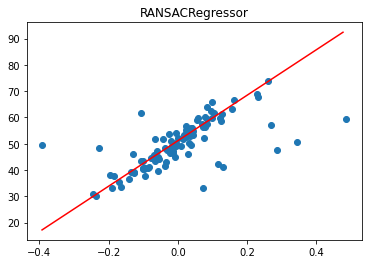

In [10]:
# ransac regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
def get_dataset():
	X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
	# add some artificial outliers
	seed(1)
	for i in range(10):
		factor = randint(2, 4)
		if random() > 0.5:
			X[i] += factor * X.std()
		else:
			X[i] -= factor * X.std()
	return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fut the model on all data
	model.fit(X, y)
	# plot the dataset
	pyplot.scatter(X, y)
	# plot the line of best fit
	xaxis = arange(X.min(), X.max(), 0.01)
	yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	pyplot.plot(xaxis, yaxis, color='r')
	# show the plot
	pyplot.title(type(model).__name__)
	pyplot.show()
 
# load dataset
X, y = get_dataset()
# define the model
model = RANSACRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)

Al ejecutar el ejemplo, primero se informa el MAE medio del modelo en el conjunto de datos.

Podemos ver que la regresión RANSAC logra un MAE de aproximadamente 4.454 en este conjunto de datos, superando al modelo de regresión lineal, pero quizás no a la regresión de Huber.

Mean MAE: 4.454 (2.165)

A continuación, el conjunto de datos se traza como un diagrama de dispersión que muestra los valores atípicos, y esto se superpone con la línea de mejor ajuste del algoritmo.

En este caso, podemos ver que la línea de mejor ajuste está alineada con el cuerpo principal de los datos, quizás incluso mejor que la gráfica de la regresión de Huber.

# Theil Sen Regression
[Theil Sen Regression](https://en.wikipedia.org/wiki/Theil%E2%80%93Sen_estimator) implica ajustar múltiples modelos de regresión en subconjuntos de los datos de entrenamiento y combinar los coeficientes al final.

Scikit-learn proporciona una implementación a través de la clase [TheilSenRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html) .

El siguiente ejemplo evalúa la regresión de Theil Sen en el conjunto de datos de regresión con valores atípicos, primero evaluando el modelo con validación cruzada repetida y luego trazando la línea de mejor ajuste.

Mean MAE: 4.371 (1.961)


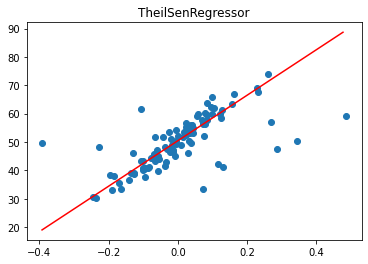

In [11]:
# theilsen regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
def get_dataset():
	X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
	# add some artificial outliers
	seed(1)
	for i in range(10):
		factor = randint(2, 4)
		if random() > 0.5:
			X[i] += factor * X.std()
		else:
			X[i] -= factor * X.std()
	return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fut the model on all data
	model.fit(X, y)
	# plot the dataset
	pyplot.scatter(X, y)
	# plot the line of best fit
	xaxis = arange(X.min(), X.max(), 0.01)
	yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	pyplot.plot(xaxis, yaxis, color='r')
	# show the plot
	pyplot.title(type(model).__name__)
	pyplot.show()
 
# load dataset
X, y = get_dataset()
# define the model
model = TheilSenRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)

Al ejecutar el ejemplo, primero se informa el MAE medio del modelo en el conjunto de datos.

Podemos ver que la regresión de Theil Sen alcanza un MAE de aproximadamente 4,371 en este conjunto de datos, superando al modelo de regresión lineal, así como a la regresión RANSAC y Huber.

Mean MAE: 4.371 (1.961)
A continuación, el conjunto de datos se traza como un diagrama de dispersión que muestra los valores atípicos, y esto se superpone con la línea de mejor ajuste del algoritmo.

En este caso, podemos ver que la línea de mejor ajuste está alineada con el cuerpo principal de los datos.

# Comparar algoritmos de regresión robustos
Ahora que estamos familiarizados con algunos algoritmos de regresión robustos populares y cómo usarlos, podemos ver cómo podemos compararlos directamente.

Puede ser útil ejecutar un experimento para comparar directamente los algoritmos de regresión robustos en el mismo conjunto de datos. Podemos comparar el rendimiento medio de cada método y, de forma más útil, utilizar herramientas como un diagrama de caja y bigotes para comparar la distribución de puntuaciones en los pliegues repetidos de validación cruzada.

El ejemplo completo se enumera a continuación.

>Linear 5.260 (1.149)
>Huber 4.435 (1.868)
>RANSAC 4.454 (2.213)
>TheilSen 4.371 (1.961)


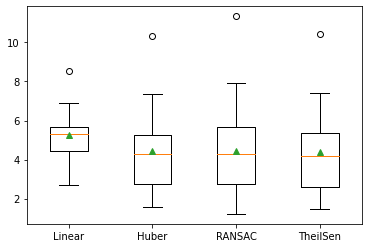

In [12]:
# compare robust regression algorithms on a regression dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
def get_dataset():
	X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
	# add some artificial outliers
	seed(1)
	for i in range(10):
		factor = randint(2, 4)
		if random() > 0.5:
			X[i] += factor * X.std()
		else:
			X[i] -= factor * X.std()
	return X, y
 
# dictionary of model names and model objects
def get_models():
	models = dict()
	models['Linear'] = LinearRegression()
	models['Huber'] = HuberRegressor()
	models['RANSAC'] = RANSACRegressor()
	models['TheilSen'] = TheilSenRegressor()
	return models
 
# evaluate a model
def evalute_model(X, y, model, name):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	scores = absolute(scores)
	return scores
 
# load the dataset
X, y = get_dataset()
# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
	# evaluate the model
	results[name] = evalute_model(X, y, model, name)
	# summarize progress
	print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))
# plot model performance for comparison
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.show()

La ejecución del ejemplo evalúa cada modelo por turno, informando las puntuaciones de alcance MAE de media y desviación estándar.

Nota: sus resultados específicos diferirán dada la naturaleza estocástica de los algoritmos de aprendizaje y el procedimiento de evaluación. Intente ejecutar el ejemplo varias veces.

Podemos ver algunas diferencias menores entre estas puntuaciones y las informadas en la sección anterior, aunque las diferencias pueden o no ser estadísticamente significativas. El patrón general de los métodos de regresión robustos que funcionan mejor que la regresión lineal se mantiene, TheilSen logra un mejor rendimiento que los otros métodos.

1. >Linear 5.260 (1.149)
2. >Huber 4.435 (1.868)
3. >RANSAC 4.405 (2.206)
4. >TheilSen 4.371 (1.961)

Se crea una gráfica que muestra una gráfica de caja y bigotes que resume la distribución de resultados para cada algoritmo evaluado.

Podemos ver claramente las distribuciones de los algoritmos de regresión robustos sentados y extendiéndose por debajo del algoritmo de regresión lineal.



También puede ser interesante comparar algoritmos de regresión robustos basados ​​en un gráfico de su línea de mejor ajuste.

El siguiente ejemplo se ajusta a cada algoritmo de regresión robusto y traza su línea de mejor ajuste en el mismo gráfico en el contexto de un gráfico de dispersión de todo el conjunto de datos de entrenamiento.

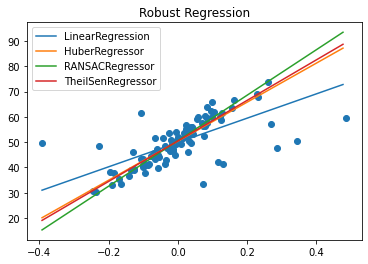

In [13]:
# plot line of best for multiple robust regression algorithms
from random import random
from random import randint
from random import seed
from numpy import arange
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
def get_dataset():
	X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
	# add some artificial outliers
	seed(1)
	for i in range(10):
		factor = randint(2, 4)
		if random() > 0.5:
			X[i] += factor * X.std()
		else:
			X[i] -= factor * X.std()
	return X, y
 
# dictionary of model names and model objects
def get_models():
	models = list()
	models.append(LinearRegression())
	models.append(HuberRegressor())
	models.append(RANSACRegressor())
	models.append(TheilSenRegressor())
	return models
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, xaxis, model):
	# fit the model on all data
	model.fit(X, y)
	# calculate outputs for grid across the domain
	yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	# plot the line of best fit
	pyplot.plot(xaxis, yaxis, label=type(model).__name__)
 
# load the dataset
X, y = get_dataset()
# define a uniform grid across the input domain
xaxis = arange(X.min(), X.max(), 0.01)
for model in get_models():
	# plot the line of best fit
	plot_best_fit(X, y, xaxis, model)
# plot the dataset
pyplot.scatter(X, y)
# show the plot
pyplot.title('Robust Regression')
pyplot.legend()
pyplot.show()

Al ejecutar el ejemplo, se crea un gráfico que muestra el conjunto de datos como un gráfico de dispersión y la línea de mejor ajuste para cada algoritmo.

Podemos ver claramente la línea fuera del eje para el algoritmo de regresión lineal y las líneas mucho mejores para los algoritmos de regresión robustos que siguen el cuerpo principal de los datos.

# Otras lecturas 
Esta sección proporciona más recursos sobre el tema si está buscando profundizar.
# APIs
* [Modelos lineales, scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html).
* [API sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html).
* [API sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
* [API sklearn.linear_model.HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).
* [klearn.linear_model.RANSACRegressor API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html).
* [sklearn.linear_model.TheilSenRegressor API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html) .
# Artículos
Regresión robusta, Wikipedia .
Estimador M, Wikipedia .
Consenso de muestra aleatoria, Wikipedia .
Estimador de Theil - Sen, Wikipedia
# Resumen
En este tutorial, descubrió algoritmos de regresión sólidos para el aprendizaje automático.

Específicamente, aprendiste:

* Se pueden usar algoritmos de regresión robustos para datos con valores atípicos en los valores de entrada o de destino.
* Cómo evaluar algoritmos de regresión robustos para una tarea de modelado predictivo de regresión.
* Cómo comparar algoritmos de regresión robustos usando su línea de mejor ajuste en el conjunto de datos.

Espero que sea de su agrado


